In [176]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [177]:
k=np.linspace(0,np.pi, 100)

In [178]:
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, kind='dDSL', delta=[1,1], U=[5,5])
 

#lat.plot_lattice();

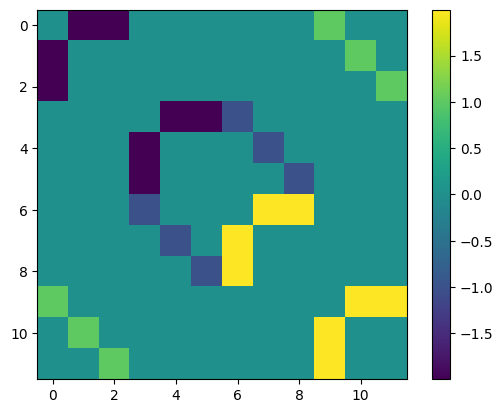

In [179]:
plt.imshow(np.real(ham.Hk(k[2], k[2])[0]))
plt.colorbar()

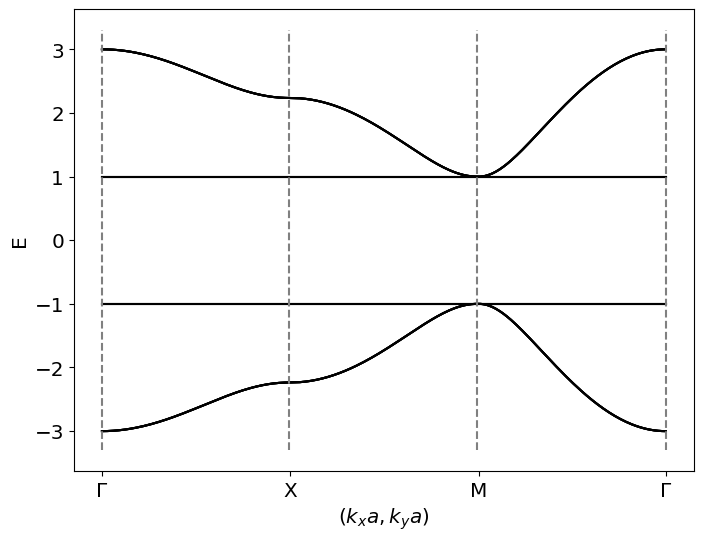

In [180]:
ham.plot_bands(k)

In [182]:
dels, nus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=20)

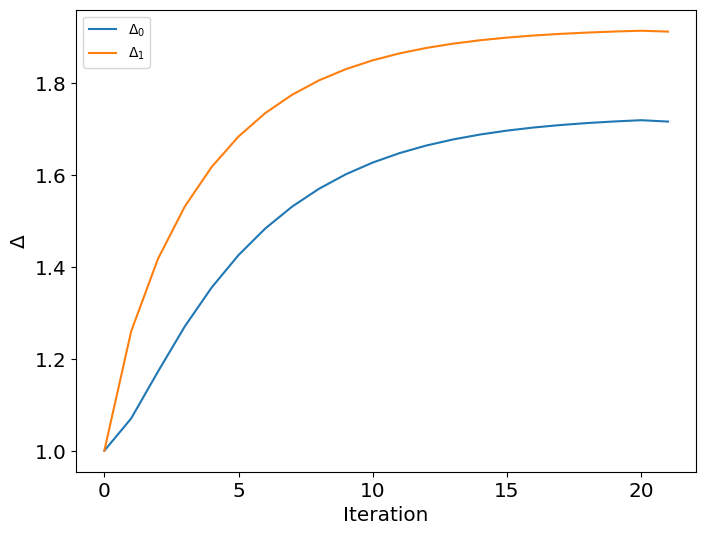

In [183]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')

plt.legend()

plt.show()

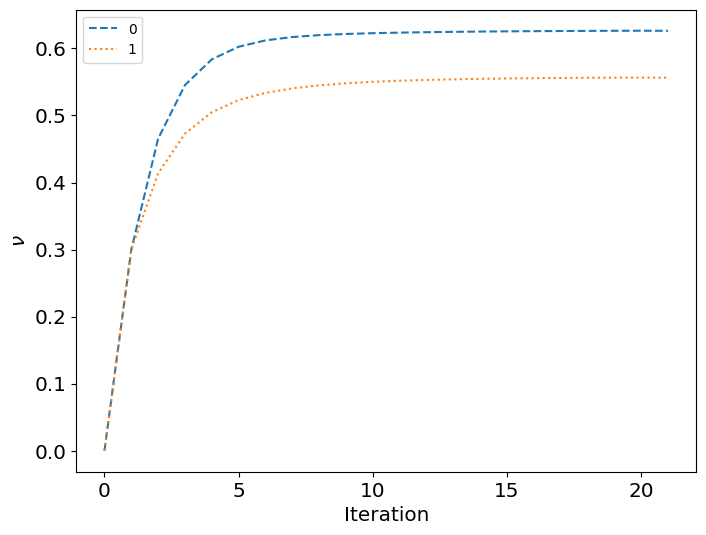

In [184]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
#plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')

plt.legend()
plt.show()

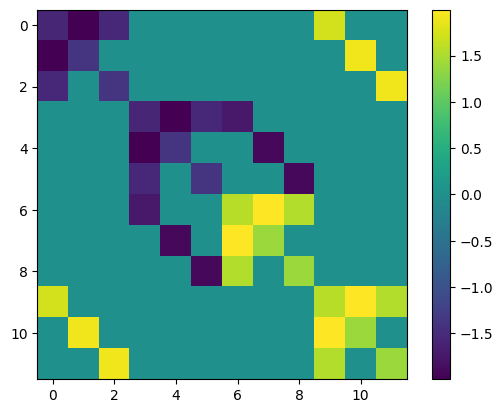

In [185]:
plt.imshow(np.real(ham.Hk(k[20], k[2])[0]))
plt.colorbar()

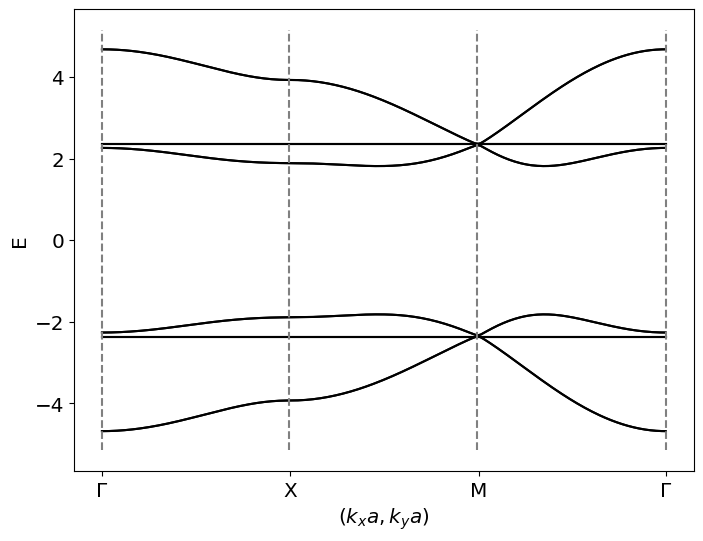

In [186]:
ham.plot_bands(k)

Earr = np.linspace(-2.5,2.5,350)
DOS = np.zeros(350)
for i in range(1):
    DOS+=ham.DOS(Earr,k, b=i,p='all')

plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.show()

In [187]:
np.linspace(-np.pi, np.pi*0.1, 5)

array([-3.14159265, -2.27765467, -1.41371669, -0.54977871,  0.31415927])

In [189]:
sfw1 = ham.SFW(50, my='x', ny='y')
sfw1

(-36.214549162104746-1.5788366663821607e-16j)

In [ ]:
def fermidirac(E,T=0,o=0):

    nE=0
    if o==0:
        if np.abs(E)<1e-14 and T!=0:
            nE = 1
        elif T==0:
            if E>0:
                nE = 0
            else:
                nE = 1
        else:
            nE = 1/(1+np.exp(E/T))
    elif o==1:
        if np.abs(E)<1e-14 and T!=0:
            nE = 1/(4*T)
        elif T==0:
            nE = 0
        else:
            nE = 1/((1+np.exp(E/T))**2)*np.exp(E)/T

    return nE


def SFW(kx, ky, T=0, my='x', ny='y'):

    gammaz = np.kron(np.diag([1,-1]), np.eye(6))
    sum = 0
    karr = np.linspace(-np.pi,np.pi*0.1,N)
    
    pflist = []
    slist = []

    evals, evec = np.linalg.eigh(ham.Hk(kx,ky)[0])
    Evec = evec.T 

    nE = [fermidirac(E,T,o=0) for E in evals]
    dnE = [fermidirac(E,T,o=1) for E in evals]
    for k,i in enumerate(evals):
        for l,j in enumerate(evals):
            if np.abs(i-j)<1e-10 or k==l:
                pf = -dnE[l]
            else:
                pf = (nE[k]-nE[l])/(j-i)

            f1 = np.matmul(np.conjugate(Evec[l]),np.matmul(ham.Hk(kx,ky,o=my)[0],Evec[k]))
            f2 = np.matmul(np.conjugate(Evec[k]),np.matmul(ham.Hk(kx,ky,o=ny)[0],Evec[l]))

            M1 = np.matmul(ham.Hk(kx,ky,o=my)[0],gammaz)
            M2 = np.matmul(gammaz,ham.Hk(kx,ky,o=ny)[0])

            f3 = np.matmul(np.conjugate(Evec[l]),np.matmul(M1,Evec[k]))
            f4 = np.matmul(np.conjugate(Evec[k]),np.matmul(M2,Evec[l]))

            slist.append((pf*(f1*f2-f3*f4),i,j, f1,f2))
            sum+=pf*(f1*f2-f3*f4)

    return sum, pflist, slist

In [ ]:
for kx in karr:
            for ky in karr:

SyntaxError: incomplete input (1287918356.py, line 2)

In [ ]:
sfw = SFW(-np.pi,0.2)

In [ ]:
sfw[0]

(4.7415505976858174e-18-1.1682533056212222e-33j)

In [ ]:
sfw[-1]

[(0j, -3.9816478404437876, -3.9816478404437876),
 (-0j, -3.9816478404437876, -3.981647840443784),
 ((-0+0j), -3.9816478404437876, -2.3651810571576455),
 (-0j, -3.9816478404437876, -2.3651810571576424),
 (0j, -3.9816478404437876, -1.90702033920219),
 (0j, -3.9816478404437876, -1.9070203392021885),
 ((4.26625739378747e-05-4.25257049833226e-19j),
  -3.9816478404437876,
  1.9070203392021883),
 ((1.0862245887875964e-07+6.816044282124344e-20j),
  -3.9816478404437876,
  1.9070203392021903),
 ((0.004472669237063526+3.006534214740886e-18j),
  -3.9816478404437876,
  2.3651810571576424),
 ((4.206258420244225e-06-2.443943439605934e-21j),
  -3.9816478404437876,
  2.365181057157643),
 ((-7.452686763924189e-10-9.554868993344365e-22j),
  -3.9816478404437876,
  3.981647840443786),
 ((-0.004707479168588236-1.8637331264620437e-18j),
  -3.9816478404437876,
  3.981647840443788),
 ((-0+0j), -3.981647840443784, -3.9816478404437876),
 (0j, -3.981647840443784, -3.981647840443784),
 ((-0+0j), -3.981647840443784

In [ ]:
sfw[2]

array([-3.98164784, -3.98164784, -2.36518106, -2.36518106, -1.90702034,
       -1.90702034,  1.90702034,  1.90702034,  2.36518106,  2.36518106,
        3.98164784,  3.98164784])

In [ ]:
sfw[-1]

[(0j, -3.9816478404437876, -3.9816478404437876),
 (-0j, -3.9816478404437876, -3.981647840443784),
 ((-0+0j), -3.9816478404437876, -2.3651810571576455),
 (-0j, -3.9816478404437876, -2.3651810571576424),
 (0j, -3.9816478404437876, -1.90702033920219),
 (0j, -3.9816478404437876, -1.9070203392021885),
 ((4.26625739378747e-05-4.25257049833226e-19j),
  -3.9816478404437876,
  1.9070203392021883),
 ((1.0862245887875964e-07+6.816044282124344e-20j),
  -3.9816478404437876,
  1.9070203392021903),
 ((0.004472669237063526+3.006534214740886e-18j),
  -3.9816478404437876,
  2.3651810571576424),
 ((4.206258420244225e-06-2.443943439605934e-21j),
  -3.9816478404437876,
  2.365181057157643),
 ((-7.452686763924189e-10-9.554868993344365e-22j),
  -3.9816478404437876,
  3.981647840443786),
 ((-0.004707479168588236-1.8637331264620437e-18j),
  -3.9816478404437876,
  3.981647840443788),
 ((-0+0j), -3.981647840443784, -3.9816478404437876),
 (0j, -3.981647840443784, -3.981647840443784),
 ((-0+0j), -3.981647840443784

In [ ]:
0.076265*0.1188

0.009060282

In [ ]:
0.068012*0.105988

0.007208455856

In [ ]:
sfw[3][0]*sfw[3][1]-sfw[3][2]*sfw[3][3]

(0.008169101031626179+0.0011599587375644947j)